# Movie Analytics Project 

## Overview

Overview Here:

### Loading in and Investigating the Data

In [18]:
import pandas as pd
import sqlite3
import zipfile

movie_gross = pd.read_csv('bom.movie_gross.csv.gz', compression='gzip')
print(movie_gross.info())

with zipfile.ZipFile('im.db.zip', 'r') as zip_ref:
    zip_ref.extractall('.')

conn = sqlite3.connect('im.db')

tables = pd.read_sql_query("SELECT name FROM sqlite_master WHERE type='table';", conn)
print(tables)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB
None
            name
0   movie_basics
1      directors
2      known_for
3     movie_akas
4  movie_ratings
5        persons
6     principals
7        writers


In [19]:
movie_gross.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


### Cleaning Movie Gross Dataset

In [20]:
# Converting 'foreign_gross' to numeric so it can be used in analysis
movie_gross['foreign_gross'] = pd.to_numeric(movie_gross['foreign_gross'].str.replace(',', ''), errors='coerce')

print(movie_gross.dtypes)

title              object
studio             object
domestic_gross    float64
foreign_gross     float64
year                int64
dtype: object


In [22]:
movie_gross.isnull().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [23]:
# Checking out the rows that have null values in studio
null_studio = movie_gross[movie_gross['studio'].isnull()]
print("Rows with null 'studio':")
print(null_studio)

Rows with null 'studio':
                              title studio  domestic_gross  foreign_gross  \
210   Outside the Law (Hors-la-loi)    NaN         96900.0      3300000.0   
555         Fireflies in the Garden    NaN         70600.0      3300000.0   
933           Keith Lemon: The Film    NaN             NaN      4000000.0   
1862                 Plot for Peace    NaN          7100.0            NaN   
2825               Secret Superstar    NaN             NaN    122000000.0   

      year  
210   2010  
555   2011  
933   2012  
1862  2014  
2825  2017  


In [25]:
# Manually updating the missing studios since there are only 5

studios = {
    210: 'Tessalit Productions',
    555: 'Senator Distribution',
    933: 'Lionsgate UK',
    1862: 'Indelible Media',
    2825: 'Aamir Khan Productions'
}

for index, studio in studios.items():
    movie_gross.at[index, 'studio'] = studio

updated_rows = movie_gross.loc[list(studios.keys())]
print(updated_rows)


                              title                  studio  domestic_gross  \
210   Outside the Law (Hors-la-loi)    Tessalit Productions         96900.0   
555         Fireflies in the Garden    Senator Distribution         70600.0   
933           Keith Lemon: The Film            Lionsgate UK             NaN   
1862                 Plot for Peace         Indelible Media          7100.0   
2825               Secret Superstar  Aamir Khan Productions             NaN   

      foreign_gross  year  
210       3300000.0  2010  
555       3300000.0  2011  
933       4000000.0  2012  
1862            NaN  2014  
2825    122000000.0  2017  


In [26]:
# Dropping rows where domestic gross is null
movie_gross.dropna(subset=['domestic_gross'], inplace=True)

In [27]:
movie_gross.isnull().sum()

title                0
studio               0
domestic_gross       0
foreign_gross     1350
year                 0
dtype: int64

In [28]:
# Creating another dataset with rows where foreign gross is not null for possible separate analysis later on
foreign_gross_not_null = movie_gross.dropna(subset=['foreign_gross'])

In [29]:
# Standardizing names in studio and title
def standardize_text(text):
    return text.strip().lower()

movie_gross['title'] = movie_gross['title'].apply(standardize_text)
movie_gross['studio'] = movie_gross['studio'].apply(standardize_text)
foreign_gross_not_null['title'] = foreign_gross_not_null['title'].apply(standardize_text)
foreign_gross_not_null['studio'] = foreign_gross_not_null['studio'].apply(standardize_text)

print(movie_gross.head())
print(foreign_gross_not_null.head())


                                         title studio  domestic_gross  \
0                                  toy story 3     bv     415000000.0   
1                   alice in wonderland (2010)     bv     334200000.0   
2  harry potter and the deathly hallows part 1     wb     296000000.0   
3                                    inception     wb     292600000.0   
4                          shrek forever after   p/dw     238700000.0   

   foreign_gross  year  
0    652000000.0  2010  
1    691300000.0  2010  
2    664300000.0  2010  
3    535700000.0  2010  
4    513900000.0  2010  
                                         title studio  domestic_gross  \
0                                  toy story 3     bv     415000000.0   
1                   alice in wonderland (2010)     bv     334200000.0   
2  harry potter and the deathly hallows part 1     wb     296000000.0   
3                                    inception     wb     292600000.0   
4                          shrek forever after

<ipython-input-29-dcc141885058>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  foreign_gross_not_null['title'] = foreign_gross_not_null['title'].apply(standardize_text)
<ipython-input-29-dcc141885058>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  foreign_gross_not_null['studio'] = foreign_gross_not_null['studio'].apply(standardize_text)


In [30]:
#Checking for duplicates in both datasets
duplicates_movie_gross = movie_gross.duplicated().sum()
print(f"Number of duplicate rows in movie_gross: {duplicates_movie_gross}")

if duplicates_movie_gross > 0:
    print("Duplicate rows in movie_gross:")
    print(movie_gross[movie_gross.duplicated()])

duplicates_foreign_gross_not_null = foreign_gross_not_null.duplicated().sum()
print(f"Number of duplicate rows in foreign_gross_not_null: {duplicates_foreign_gross_not_null}")

if duplicates_foreign_gross_not_null > 0:
    print("Duplicate rows in foreign_gross_not_null:")
    print(foreign_gross_not_null[foreign_gross_not_null.duplicated()])


Number of duplicate rows in movie_gross: 0
Number of duplicate rows in foreign_gross_not_null: 0


### Investigating and Merging the IMDB Dataset

In [31]:
print(tables)

            name
0   movie_basics
1      directors
2      known_for
3     movie_akas
4  movie_ratings
5        persons
6     principals
7        writers


In [38]:
# Checking if primary_title could be the key linking this table to movie_gross
movie_basics = pd.read_sql_query("SELECT * FROM movie_basics", conn)

print(movie_basics.head())

    movie_id                    primary_title              original_title  \
0  tt0063540                        Sunghursh                   Sunghursh   
1  tt0066787  One Day Before the Rainy Season             Ashad Ka Ek Din   
2  tt0069049       The Other Side of the Wind  The Other Side of the Wind   
3  tt0069204                  Sabse Bada Sukh             Sabse Bada Sukh   
4  tt0100275         The Wandering Soap Opera       La Telenovela Errante   

   start_year  runtime_minutes                genres  
0        2013            175.0    Action,Crime,Drama  
1        2019            114.0       Biography,Drama  
2        2018            122.0                 Drama  
3        2018              NaN          Comedy,Drama  
4        2017             80.0  Comedy,Drama,Fantasy  


In [49]:
# Standardizing primary title so that it can be used for a merge
def standardize_text(text):
    return text.strip().lower()

movie_basics['primary_title'] = movie_basics['primary_title'].apply(standardize_text)

print(movie_basics.head())


    movie_id                    primary_title              original_title  \
0  tt0063540                        sunghursh                   Sunghursh   
1  tt0066787  one day before the rainy season             Ashad Ka Ek Din   
2  tt0069049       the other side of the wind  The Other Side of the Wind   
3  tt0069204                  sabse bada sukh             Sabse Bada Sukh   
4  tt0100275         the wandering soap opera       La Telenovela Errante   

   start_year  runtime_minutes                genres  
0        2013            175.0    Action,Crime,Drama  
1        2019            114.0       Biography,Drama  
2        2018            122.0                 Drama  
3        2018              NaN          Comedy,Drama  
4        2017             80.0  Comedy,Drama,Fantasy  


In [60]:
# Loading in the other tables
conn = sqlite3.connect('im.db')
movie_basics = pd.read_sql_query("SELECT * FROM movie_basics", conn)
movie_ratings = pd.read_sql_query("SELECT * FROM movie_ratings", conn)
movie_akas = pd.read_sql_query("SELECT * FROM movie_akas", conn)
writers = pd.read_sql_query("SELECT * FROM writers", conn)
directors = pd.read_sql_query("SELECT * FROM directors", conn)
persons = pd.read_sql_query("SELECT * FROM persons", conn)

In [56]:
movie_ratings.head()

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [57]:
movie_akas.head()

,movie_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,None,None,0.0
1,tt0369610,11,Jurashikku warudo,JP,None,imdbDisplay,None,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,None,imdbDisplay,None,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,None,None,short title,0.0
4,tt0369610,14,Jurassic World,FR,None,imdbDisplay,None,0.0


In [83]:
# Using an SQL query to get relevant info
query_create_temp_movie_basics = """
CREATE TEMP TABLE IF NOT EXISTS temp_movie_basics AS
SELECT 
    mb.movie_id,
    mb.primary_title,
    mb.start_year,
    mb.runtime_minutes,
    mb.genres,
    mr.averagerating
FROM 
    movie_basics mb
LEFT JOIN 
    movie_ratings mr ON mb.movie_id = mr.movie_id;
"""

conn.execute(query_create_temp_movie_basics)


conn.commit()


In [84]:
# Using an SQL query to get relevant info
query_read_first_df = """
SELECT 
    movie_id,
    primary_title,
    runtime_minutes,
    genres,
    averagerating
FROM 
    temp_movie_basics;
"""

first_df = pd.read_sql_query(query_read_first_df, conn)

print(first_df.head())


    movie_id                    primary_title  runtime_minutes  \
0  tt0063540                        Sunghursh            175.0   
1  tt0063540                        Sunghursh            175.0   
2  tt0063540                        Sunghursh            175.0   
3  tt0063540                        Sunghursh            175.0   
4  tt0066787  One Day Before the Rainy Season            114.0   

               genres  averagerating  
0  Action,Crime,Drama            7.0  
1  Action,Crime,Drama            7.0  
2  Action,Crime,Drama            7.0  
3  Action,Crime,Drama            7.0  
4     Biography,Drama            7.2  


In [94]:
conn.close()

In [114]:
# Standardizing the title for merging purposes
def standardize_text(text):
    return text.strip().lower() if isinstance(text, str) else text

first_df['primary_title'] = first_df['primary_title'].apply(standardize_text)
movie_gross['title'] = movie_gross['title'].apply(standardize_text)

first_df.dropna(subset=['primary_title'], inplace=True)
movie_gross.dropna(subset=['title'], inplace=True)

first_df.drop_duplicates(subset=['movie_id', 'primary_title'], inplace=True)
movie_gross.drop_duplicates(subset=['title'], inplace=True)

print("First DataFrame shape after dropping duplicates:", first_df.shape)
print("Movie Gross DataFrame shape after dropping duplicates:", movie_gross.shape)


First DataFrame shape after dropping duplicates: (146144, 5)
Movie Gross DataFrame shape after dropping duplicates: (3358, 5)


In [115]:
# Perform a full outer merge
full_df = pd.merge(first_df, movie_gross, left_on='primary_title', right_on='title', how='outer')

print("Full DataFrame shape after merge:", full_df.shape)
print(full_df.head())

Full DataFrame shape after merge: (146819, 10)
    movie_id                    primary_title  runtime_minutes  \
0  tt0063540                        sunghursh            175.0   
1  tt0066787  one day before the rainy season            114.0   
2  tt0069049       the other side of the wind            122.0   
3  tt0069204                  sabse bada sukh              NaN   
4  tt0100275         the wandering soap opera             80.0   

                 genres  averagerating title studio  domestic_gross  \
0    Action,Crime,Drama            7.0   NaN    NaN             NaN   
1       Biography,Drama            7.2   NaN    NaN             NaN   
2                 Drama            6.9   NaN    NaN             NaN   
3          Comedy,Drama            6.1   NaN    NaN             NaN   
4  Comedy,Drama,Fantasy            6.5   NaN    NaN             NaN   

   foreign_gross  year  
0            NaN   NaN  
1            NaN   NaN  
2            NaN   NaN  
3            NaN   NaN  
4   

In [116]:
full_df.isnull().sum()

movie_id              675
primary_title         675
runtime_minutes     32414
genres               6083
averagerating       72963
title              142684
studio             142684
domestic_gross     142684
foreign_gross      144325
year               142684
dtype: int64

In [117]:
# Looking for rows where primary_title is null and title is not null
null_primary_not_null_title = full_df[full_df['primary_title'].isnull() & full_df['title'].notnull()]

print("Rows where primary_title is null and title is not null:")
print(null_primary_not_null_title.head())
print("Number of such rows:", null_primary_not_null_title.shape[0])


Rows where primary_title is null and title is not null:
       movie_id primary_title  runtime_minutes genres  averagerating  \
146144      NaN           NaN              NaN    NaN            NaN   
146145      NaN           NaN              NaN    NaN            NaN   
146146      NaN           NaN              NaN    NaN            NaN   
146147      NaN           NaN              NaN    NaN            NaN   
146148      NaN           NaN              NaN    NaN            NaN   

                                              title studio  domestic_gross  \
146144                   alice in wonderland (2010)     bv     334200000.0   
146145  harry potter and the deathly hallows part 1     wb     296000000.0   
146146                   clash of the titans (2010)     wb     163200000.0   
146147                                  tron legacy     bv     172100000.0   
146148                                 knight & day    fox      76400000.0   

        foreign_gross    year  
146144    

In [118]:
# Fill missing primary_title values with title
full_df['primary_title'] = full_df['primary_title'].fillna(full_df['title'])

# Fill missing title values with primary_title
full_df['title'] = full_df['title'].fillna(full_df['primary_title'])

print(full_df.head())

# Check for any remaining missing values in key columns
missing_values = full_df[['primary_title', 'title']].isnull().sum()
print("Missing values in key columns after filling:\n", missing_values)

    movie_id                    primary_title  runtime_minutes  \
0  tt0063540                        sunghursh            175.0   
1  tt0066787  one day before the rainy season            114.0   
2  tt0069049       the other side of the wind            122.0   
3  tt0069204                  sabse bada sukh              NaN   
4  tt0100275         the wandering soap opera             80.0   

                 genres  averagerating                            title  \
0    Action,Crime,Drama            7.0                        sunghursh   
1       Biography,Drama            7.2  one day before the rainy season   
2                 Drama            6.9       the other side of the wind   
3          Comedy,Drama            6.1                  sabse bada sukh   
4  Comedy,Drama,Fantasy            6.5         the wandering soap opera   

  studio  domestic_gross  foreign_gross  year  
0    NaN             NaN            NaN   NaN  
1    NaN             NaN            NaN   NaN  
2    NaN

In [119]:
full_df.isnull().sum()

movie_id              675
primary_title           0
runtime_minutes     32414
genres               6083
averagerating       72963
title                   0
studio             142684
domestic_gross     142684
foreign_gross      144325
year               142684
dtype: int64

In [121]:
writers

,movie_id,person_id,writer_name
0,tt0285252,nm0899854,Tony Vitale
1,tt0438973,nm0175726,Steve Conrad
2,tt0438973,nm1802864,Sean Sorensen
3,tt0462036,nm1940585,Bill Haley
4,tt0835418,nm0310087,Peter Gaulke
...,...,...,...
255868,tt8999892,nm10122246,Bradley T. Castle
255869,tt8999974,nm10122357,Daysi Burbano
255870,tt9001390,nm6711477,Bernard Lessa
255871,tt9004986,nm4993825,Fredrik Horn Akselsen


In [125]:
# Aggregating writers for each movie and adding them to the df
writers['writer_name'] = writers['writer_name'].fillna('unknown')

writers_grouped = writers.groupby('movie_id')['writer_name'].agg(lambda x: ', '.join(x)).reset_index()

writers_grouped.rename(columns={'writer_name': 'writers'}, inplace=True)

print(writers_grouped.head())

# Merge the writers_grouped df with full_df on 'movie_id'
full_df = pd.merge(full_df, writers_grouped, on='movie_id', how='left')

full_df.head()

    movie_id                                            writers
0  tt0063540  Abrar Alvi, Mahasweta Devi, Gulzar, Anjana Rawail
1  tt0069049                            Orson Welles, Oja Kodar
2  tt0069204                                             Gulzar
3  tt0100275           Pía Rey, Pía Rey, Raoul Ruiz, Raoul Ruiz
4  tt0111414                                       Frank Howson


,movie_id,primary_title,runtime_minutes,genres,averagerating,title,studio,domestic_gross,foreign_gross,year,writers_x,writers_y
0,tt0063540,sunghursh,175.0,"Action,Crime,Drama",7.0,sunghursh,NaN,NaN,NaN,NaN,"Abrar Alvi, Mahasweta Devi, Gulzar, Anjana Rawail","Abrar Alvi, Mahasweta Devi, Gulzar, Anjana Rawail"
1,tt0066787,one day before the rainy season,114.0,"Biography,Drama",7.2,one day before the rainy season,NaN,NaN,NaN,NaN,NaN,NaN
2,tt0069049,the other side of the wind,122.0,Drama,6.9,the other side of the wind,NaN,NaN,NaN,NaN,"Orson Welles, Oja Kodar","Orson Welles, Oja Kodar"
3,tt0069204,sabse bada sukh,NaN,"Comedy,Drama",6.1,sabse bada sukh,NaN,NaN,NaN,NaN,Gulzar,Gulzar
4,tt0100275,the wandering soap opera,80.0,"Comedy,Drama,Fantasy",6.5,the wandering soap opera,NaN,NaN,NaN,NaN,"Pía Rey, Pía Rey, Raoul Ruiz, Raoul Ruiz","Pía Rey, Pía Rey, Raoul Ruiz, Raoul Ruiz"


In [126]:
full_df.columns

Index(['movie_id', 'primary_title', 'runtime_minutes', 'genres',
       'averagerating', 'title', 'studio', 'domestic_gross', 'foreign_gross',
       'year', 'writers_x', 'writers_y'],
      dtype='object')

In [127]:
# Checking if writers_x is identical to writers_y
if 'writers_x' in full_df.columns and 'writers_y' in full_df.columns:
    are_identical = full_df['writers_x'].equals(full_df['writers_y'])
    print("Are writers_x and writers_y identical?", are_identical)
else:
    print("Either writers_x or writers_y column does not exist.")

Are writers_x and writers_y identical? True


In [128]:
full_df.drop(columns=['writers_y'], inplace=True)

In [130]:
full_df.head(20)

,movie_id,primary_title,runtime_minutes,genres,averagerating,title,studio,domestic_gross,foreign_gross,year,writers_x
0,tt0063540,sunghursh,175.0,"Action,Crime,Drama",7.0,sunghursh,NaN,NaN,NaN,NaN,"Abrar Alvi, Mahasweta Devi, Gulzar, Anjana Rawail"
1,tt0066787,one day before the rainy season,114.0,"Biography,Drama",7.2,one day before the rainy season,NaN,NaN,NaN,NaN,NaN
2,tt0069049,the other side of the wind,122.0,Drama,6.9,the other side of the wind,NaN,NaN,NaN,NaN,"Orson Welles, Oja Kodar"
3,tt0069204,sabse bada sukh,NaN,"Comedy,Drama",6.1,sabse bada sukh,NaN,NaN,NaN,NaN,Gulzar
4,tt0100275,the wandering soap opera,80.0,"Comedy,Drama,Fantasy",6.5,the wandering soap opera,NaN,NaN,NaN,NaN,"Pía Rey, Pía Rey, Raoul Ruiz, Raoul Ruiz"
5,tt0111414,a thin life,75.0,Comedy,NaN,a thin life,NaN,NaN,NaN,NaN,Frank Howson
6,tt0112502,bigfoot,NaN,"Horror,Thriller",4.1,bigfoot,NaN,NaN,NaN,NaN,NaN
7,tt4503112,bigfoot,NaN,"Action,Horror",4.6,bigfoot,NaN,NaN,NaN,NaN,"Danette Bradford, Rocky Burnswork"
8,tt9181914,bigfoot,86.0,"Animation,Family",2.5,bigfoot,NaN,NaN,NaN,NaN,Holly May Opee
9,tt0137204,joe finds grace,83.0,"Adventure,Animation,Comedy",8.1,joe finds grace,NaN,NaN,NaN,NaN,Anthony Harrison


In [131]:
full_df.isnull().sum()

movie_id              675
primary_title           0
runtime_minutes     32414
genres               6083
averagerating       72963
title                   0
studio             142684
domestic_gross     142684
foreign_gross      144325
year               142684
writers_x           36558
dtype: int64

In [132]:
# Aggregating and adding directors to the df via another merge
directors['director_name'] = directors['director_name'].fillna('unknown')

directors_grouped = directors.groupby('movie_id')['director_name'].agg(lambda x: ', '.join(x)).reset_index()

directors_grouped.rename(columns={'director_name': 'directors'}, inplace=True)

print(directors_grouped.head())

#Merging the directors_grouped with full_df on 'movie_id'
full_df = pd.merge(full_df, directors_grouped, on='movie_id', how='left')

print(full_df.head())

full_df.head()

    movie_id                                          directors
0  tt0063540  Harnam Singh Rawail, Harnam Singh Rawail, Harn...
1  tt0066787                                          Mani Kaul
2  tt0069049                         Orson Welles, Orson Welles
3  tt0069204                               Hrishikesh Mukherjee
4  tt0100275  Valeria Sarmiento, Raoul Ruiz, Valeria Sarmien...
    movie_id                    primary_title  runtime_minutes  \
0  tt0063540                        sunghursh            175.0   
1  tt0066787  one day before the rainy season            114.0   
2  tt0069049       the other side of the wind            122.0   
3  tt0069204                  sabse bada sukh              NaN   
4  tt0100275         the wandering soap opera             80.0   

                 genres  averagerating                            title  \
0    Action,Crime,Drama            7.0                        sunghursh   
1       Biography,Drama            7.2  one day before the rainy seas

,movie_id,primary_title,runtime_minutes,genres,averagerating,title,studio,domestic_gross,foreign_gross,year,writers_x,directors
0,tt0063540,sunghursh,175.0,"Action,Crime,Drama",7.0,sunghursh,NaN,NaN,NaN,NaN,"Abrar Alvi, Mahasweta Devi, Gulzar, Anjana Rawail","Harnam Singh Rawail, Harnam Singh Rawail, Harn..."
1,tt0066787,one day before the rainy season,114.0,"Biography,Drama",7.2,one day before the rainy season,NaN,NaN,NaN,NaN,NaN,Mani Kaul
2,tt0069049,the other side of the wind,122.0,Drama,6.9,the other side of the wind,NaN,NaN,NaN,NaN,"Orson Welles, Oja Kodar","Orson Welles, Orson Welles"
3,tt0069204,sabse bada sukh,NaN,"Comedy,Drama",6.1,sabse bada sukh,NaN,NaN,NaN,NaN,Gulzar,Hrishikesh Mukherjee
4,tt0100275,the wandering soap opera,80.0,"Comedy,Drama,Fantasy",6.5,the wandering soap opera,NaN,NaN,NaN,NaN,"Pía Rey, Pía Rey, Raoul Ruiz, Raoul Ruiz","Valeria Sarmiento, Raoul Ruiz, Valeria Sarmien..."


In [134]:
full_df.isnull().sum()

movie_id              675
primary_title           0
runtime_minutes     32414
genres               6083
averagerating       72963
title                   0
studio             142684
domestic_gross     142684
foreign_gross      144325
year               142684
writers_x           36558
directors            6402
dtype: int64

In [138]:
# Standardizing names for directors and writers

# Creating a function to standardize text
def standardize_text(text):
    return text.strip().lower() if isinstance(text, str) else text

# Creating a function to standardize names separated by commas for multiple writers/directors
def standardize_names(names):
    if isinstance(names, str):
        return ', '.join([standardize_text(name) for name in names.split(',')])
    return names

full_df['directors'] = full_df['directors'].apply(standardize_names)

full_df['writers_x'] = full_df['writers_x'].apply(standardize_names)

full_df[['directors', 'writers_x']].head()

,directors,writers_x
0,"harnam singh rawail, harnam singh rawail, harn...","abrar alvi, mahasweta devi, gulzar, anjana rawail"
1,mani kaul,NaN
2,"orson welles, orson welles","orson welles, oja kodar"
3,hrishikesh mukherjee,gulzar
4,"valeria sarmiento, raoul ruiz, valeria sarmien...","pía rey, pía rey, raoul ruiz, raoul ruiz"


In [141]:
#Removing copies of names
def remove_duplicates(names):
    if isinstance(names, str):
        unique_names = set()
        standardized_names = []
        for name in names.split(','):
            name = name.strip()
            if name not in unique_names:
                standardized_names.append(name)
                unique_names.add(name)
        return ', '.join(standardized_names)
    return names

# Apply the function to remove duplicates in directors and writers
full_df['directors'] = full_df['directors'].apply(remove_duplicates)

full_df['writers_x'] = full_df['writers_x'].apply(remove_duplicates)

print(full_df[['directors', 'writers_x']].head())

                       directors  \
0            harnam singh rawail   
1                      mani kaul   
2                   orson welles   
3           hrishikesh mukherjee   
4  valeria sarmiento, raoul ruiz   

                                           writers_x  
0  abrar alvi, mahasweta devi, gulzar, anjana rawail  
1                                                NaN  
2                            orson welles, oja kodar  
3                                             gulzar  
4                                pía rey, raoul ruiz  


In [142]:
full_df.head(10)

,movie_id,primary_title,runtime_minutes,genres,averagerating,title,studio,domestic_gross,foreign_gross,year,writers_x,directors
0,tt0063540,sunghursh,175.0,"Action,Crime,Drama",7.0,sunghursh,NaN,NaN,NaN,NaN,"abrar alvi, mahasweta devi, gulzar, anjana rawail",harnam singh rawail
1,tt0066787,one day before the rainy season,114.0,"Biography,Drama",7.2,one day before the rainy season,NaN,NaN,NaN,NaN,NaN,mani kaul
2,tt0069049,the other side of the wind,122.0,Drama,6.9,the other side of the wind,NaN,NaN,NaN,NaN,"orson welles, oja kodar",orson welles
3,tt0069204,sabse bada sukh,NaN,"Comedy,Drama",6.1,sabse bada sukh,NaN,NaN,NaN,NaN,gulzar,hrishikesh mukherjee
4,tt0100275,the wandering soap opera,80.0,"Comedy,Drama,Fantasy",6.5,the wandering soap opera,NaN,NaN,NaN,NaN,"pía rey, raoul ruiz","valeria sarmiento, raoul ruiz"
5,tt0111414,a thin life,75.0,Comedy,NaN,a thin life,NaN,NaN,NaN,NaN,frank howson,frank howson
6,tt0112502,bigfoot,NaN,"Horror,Thriller",4.1,bigfoot,NaN,NaN,NaN,NaN,NaN,mc jones
7,tt4503112,bigfoot,NaN,"Action,Horror",4.6,bigfoot,NaN,NaN,NaN,NaN,"danette bradford, rocky burnswork",david heavener
8,tt9181914,bigfoot,86.0,"Animation,Family",2.5,bigfoot,NaN,NaN,NaN,NaN,holly may opee,evan tramel
9,tt0137204,joe finds grace,83.0,"Adventure,Animation,Comedy",8.1,joe finds grace,NaN,NaN,NaN,NaN,anthony harrison,anthony harrison


In [143]:
full_df.isnull().sum()

movie_id              675
primary_title           0
runtime_minutes     32414
genres               6083
averagerating       72963
title                   0
studio             142684
domestic_gross     142684
foreign_gross      144325
year               142684
writers_x           36558
directors            6402
dtype: int64

# Opening New Datasets to Try to Fill Missing Values

In [151]:
# Loading in the additional datasets 
tn_movie_budgets = pd.read_csv('tn.movie_budgets.csv.gz', encoding='ISO-8859-1')
tmdb_movies = pd.read_csv('tmdb.movies.csv.gz', encoding='ISO-8859-1')
rt_reviews = pd.read_csv('rt.reviews.tsv.gz', sep='\t', encoding='ISO-8859-1')
rt_movie_info = pd.read_csv('rt.movie_info.tsv.gz', sep='\t', encoding='ISO-8859-1')

# Displaying the heads of each of the datasets
print("tn.movie_budgets.csv.gz:")
print(tn_movie_budgets.head(), "\n")

print("tmdb.movies.csv.gz:")
print(tmdb_movies.head(), "\n")

print("rt.reviews.tsv.gz:")
print(rt_reviews.head(), "\n")

print("rt.movie_info.tsv.gz:")
print(rt_movie_info.head(), "\n")


tn.movie_budgets.csv.gz:
   id  release_date                                        movie  \
0   1  Dec 18, 2009                                       Avatar   
1   2  May 20, 2011  Pirates of the Caribbean: On Stranger Tides   
2   3   Jun 7, 2019                                 Dark Phoenix   
3   4   May 1, 2015                      Avengers: Age of Ultron   
4   5  Dec 15, 2017            Star Wars Ep. VIII: The Last Jedi   

  production_budget domestic_gross worldwide_gross  
0      $425,000,000   $760,507,625  $2,776,345,279  
1      $410,600,000   $241,063,875  $1,045,663,875  
2      $350,000,000    $42,762,350    $149,762,350  
3      $330,600,000   $459,005,868  $1,403,013,963  
4      $317,000,000   $620,181,382  $1,316,721,747   

tmdb.movies.csv.gz:
   Unnamed: 0            genre_ids     id original_language  \
0           0      [12, 14, 10751]  12444                en   
1           1  [14, 12, 16, 10751]  10191                en   
2           2        [12, 28, 878]  1

In [152]:
tn_movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [165]:
#Standardizing the data
def standardize_text(text):
    return text.strip().lower()

#Creating a function to convert currency to a numeric data type
def convert_currency(value):
    return int(value.replace('$', '').replace(',', ''))

# Standardizing movie names
tn_movie_budgets['movie'] = tn_movie_budgets['movie'].apply(standardize_text)

# Converting currency to a numeric datatype
tn_movie_budgets['domestic_gross'] = tn_movie_budgets['domestic_gross'].apply(convert_currency)
tn_movie_budgets['worldwide_gross'] = tn_movie_budgets['worldwide_gross'].apply(convert_currency)

print(tn_movie_budgets.head())

   id  release_date                                        movie  \
0   1  Dec 18, 2009                                       avatar   
1   2  May 20, 2011  pirates of the caribbean: on stranger tides   
2   3   Jun 7, 2019                                 dark phoenix   
3   4   May 1, 2015                      avengers: age of ultron   
4   5  Dec 15, 2017            star wars ep. viii: the last jedi   

  production_budget  domestic_gross  worldwide_gross  
0      $425,000,000       760507625       2776345279  
1      $410,600,000       241063875       1045663875  
2      $350,000,000        42762350        149762350  
3      $330,600,000       459005868       1403013963  
4      $317,000,000       620181382       1316721747  


In [179]:
#Reapeating the above with production budget
tn_movie_budgets["production_budget"] = tn_movie_budgets["production_budget"].apply(convert_currency)
tn_movie_budgets["production_budget"].head()

0    425000000
1    410600000
2    350000000
3    330600000
4    317000000
Name: production_budget, dtype: int64

In [156]:
tn_movie_budgets.isnull().sum()

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

In [157]:
tn_movie_budgets.shape

(5782, 6)

In [153]:
tmdb_movies.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [167]:
#Found genre ids on tmdb website
#Replacing Genre ids with genre names
genre_dict = {
    28: 'Action',
    12: 'Adventure',
    16: 'Animation',
    35: 'Comedy',
    80: 'Crime',
    99: 'Documentary',
    18: 'Drama',
    10751: 'Family',
    14: 'Fantasy',
    36: 'History',
    27: 'Horror',
    10402: 'Music',
    9648: 'Mystery',
    10749: 'Romance',
    878: 'Science Fiction',
    10770: 'TV Movie',
    53: 'Thriller',
    10752: 'War',
    37: 'Western'
}

print(genre_dict)

# Defining a function to map genre IDs to genre names
def map_genre_ids_to_names(genre_ids):
    return ', '.join([genre_dict.get(genre_id, 'Unknown') for genre_id in genre_ids])

tmdb_movies['genre_ids'] = tmdb_movies['genre_ids'].apply(lambda x: eval(x) if isinstance(x, str) else x)

# Applying the function to the genre_ids column to create a new column called genre
tmdb_movies['genre'] = tmdb_movies['genre_ids'].apply(map_genre_ids_to_names)

tmdb_movies[['genre']].head()


{28: 'Action', 12: 'Adventure', 16: 'Animation', 35: 'Comedy', 80: 'Crime', 99: 'Documentary', 18: 'Drama', 10751: 'Family', 14: 'Fantasy', 36: 'History', 27: 'Horror', 10402: 'Music', 9648: 'Mystery', 10749: 'Romance', 878: 'Science Fiction', 10770: 'TV Movie', 53: 'Thriller', 10752: 'War', 37: 'Western'}


,genre
0,"Adventure, Fantasy, Family"
1,"Fantasy, Adventure, Animation, Family"
2,"Adventure, Action, Science Fiction"
3,"Animation, Comedy, Family"
4,"Action, Science Fiction, Adventure"


In [169]:
full_df["genres"].head()

0      Action,Crime,Drama
1         Biography,Drama
2                   Drama
3            Comedy,Drama
4    Comedy,Drama,Fantasy
Name: genres, dtype: object

In [173]:
full_df["genres"].value_counts()

Documentary                    32185
Drama                          21486
Comedy                          9177
Horror                          4372
Comedy,Drama                    3519
                               ...  
Comedy,Musical,War                 1
Comedy,History,Musical             1
Family,News                        1
Horror,Sci-Fi,War                  1
Documentary,Mystery,Romance        1
Name: genres, Length: 1085, dtype: int64

In [174]:
# Checking for nonstring values before I standardize genres
def check_non_string_values(df, column_name):
    return df[~df[column_name].apply(lambda x: isinstance(x, str))]

non_string_tmdb_movies = check_non_string_values(tmdb_movies, 'genre')
print("Non-string values in 'genre' column of tmdb_movies:")
print(non_string_tmdb_movies[['genre']])

non_string_full_df = check_non_string_values(full_df, 'genres')
print("Non-string values in 'genres' column of full_df:")
print(non_string_full_df[['genres']])


Non-string values in 'genre' column of tmdb_movies:
Empty DataFrame
Columns: [genre]
Index: []
Non-string values in 'genres' column of full_df:
       genres
18       None
22       None
26       None
41       None
48       None
...       ...
146814    NaN
146815    NaN
146816    NaN
146817    NaN
146818    NaN

[6083 rows x 1 columns]


In [175]:
full_df['genres'] = full_df['genres'].fillna('')

In [176]:
#Standardizing genre and dropping genre ids

def standardize_genres(genre_string):
    if genre_string is None:
        return ''
    genres = [genre.strip().lower() for genre in genre_string.split(',')]
    genres.sort()
    return ','.join(genres)

tmdb_movies['genre'] = tmdb_movies['genre'].apply(standardize_genres)
full_df['genres'] = full_df['genres'].apply(standardize_genres)

tmdb_movies.drop(columns=['genre_ids'], inplace=True)

tmdb_movies['genre'].head()
full_df['genres'].head()

0      action,crime,drama
1         biography,drama
2                   drama
3            comedy,drama
4    comedy,drama,fantasy
Name: genres, dtype: object

In [177]:
tmdb_movies['genre'].head()

0              adventure,family,fantasy
1    adventure,animation,family,fantasy
2      action,adventure,science fiction
3               animation,comedy,family
4      action,adventure,science fiction
Name: genre, dtype: object

In [181]:
tmdb_movies.head()

,Unnamed: 0,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,genre
0,0,12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,"adventure,family,fantasy"
1,1,10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,"adventure,animation,family,fantasy"
2,2,10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368,"action,adventure,science fiction"
3,3,862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174,"animation,comedy,family"
4,4,27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186,"action,adventure,science fiction"


In [183]:
#Standardizing title name
tmdb_movies['title'] = tmdb_movies['title'].apply(standardize_text)
tmdb_movies["title"].head()

0    harry potter and the deathly hallows: part 1
1                        how to train your dragon
2                                      iron man 2
3                                       toy story
4                                       inception
Name: title, dtype: object

In [168]:
tmdb_movies.isnull().sum()

Unnamed: 0           0
genre_ids            0
id                   0
original_language    0
original_title       0
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
genre                0
dtype: int64

In [162]:
#Checking that vote average is the same as averagerating and has a range of 0-10
tmdb_movies["vote_average"].min()

0.0

In [163]:
tmdb_movies["vote_average"].max()

10.0

In [185]:
#Checking vote average dtype

vote_average_dtype = tmdb_movies["vote_average"].dtype

print(f"The data type of the 'vote_average' column is: {vote_average_dtype}")

The data type of the 'vote_average' column is: float64


In [188]:
average_rating_dtype = full_df["averagerating"].dtype
print(f"The data type of the averagerating column is: {average_rating_dtype}")

The data type of the averagerating column is: float64


# Merging the 3 Datasets

In [189]:
full_df.head()

,movie_id,primary_title,runtime_minutes,genres,averagerating,title,studio,domestic_gross,foreign_gross,year,writers_x,directors
0,tt0063540,sunghursh,175.0,"action,crime,drama",7.0,sunghursh,NaN,NaN,NaN,NaN,"abrar alvi, mahasweta devi, gulzar, anjana rawail",harnam singh rawail
1,tt0066787,one day before the rainy season,114.0,"biography,drama",7.2,one day before the rainy season,NaN,NaN,NaN,NaN,NaN,mani kaul
2,tt0069049,the other side of the wind,122.0,drama,6.9,the other side of the wind,NaN,NaN,NaN,NaN,"orson welles, oja kodar",orson welles
3,tt0069204,sabse bada sukh,NaN,"comedy,drama",6.1,sabse bada sukh,NaN,NaN,NaN,NaN,gulzar,hrishikesh mukherjee
4,tt0100275,the wandering soap opera,80.0,"comedy,drama,fantasy",6.5,the wandering soap opera,NaN,NaN,NaN,NaN,"pía rey, raoul ruiz","valeria sarmiento, raoul ruiz"


In [194]:
#Renaming genres genre and averagerating vote_average for merging purposes
full_df.rename(columns={'genres': 'genre'}, inplace=True)
full_df.rename(columns={'averagerating': 'vote_average'}, inplace=True)
full_df.head()

,movie_id,primary_title,runtime_minutes,genre,vote_average,title,studio,domestic_gross,foreign_gross,year,writers_x,directors
0,tt0063540,sunghursh,175.0,"action,crime,drama",7.0,sunghursh,NaN,NaN,NaN,NaN,"abrar alvi, mahasweta devi, gulzar, anjana rawail",harnam singh rawail
1,tt0066787,one day before the rainy season,114.0,"biography,drama",7.2,one day before the rainy season,NaN,NaN,NaN,NaN,NaN,mani kaul
2,tt0069049,the other side of the wind,122.0,drama,6.9,the other side of the wind,NaN,NaN,NaN,NaN,"orson welles, oja kodar",orson welles
3,tt0069204,sabse bada sukh,NaN,"comedy,drama",6.1,sabse bada sukh,NaN,NaN,NaN,NaN,gulzar,hrishikesh mukherjee
4,tt0100275,the wandering soap opera,80.0,"comedy,drama,fantasy",6.5,the wandering soap opera,NaN,NaN,NaN,NaN,"pía rey, raoul ruiz","valeria sarmiento, raoul ruiz"


In [191]:
tn_movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",avatar,425000000,760507625,2776345279
1,2,"May 20, 2011",pirates of the caribbean: on stranger tides,410600000,241063875,1045663875
2,3,"Jun 7, 2019",dark phoenix,350000000,42762350,149762350
3,4,"May 1, 2015",avengers: age of ultron,330600000,459005868,1403013963
4,5,"Dec 15, 2017",star wars ep. viii: the last jedi,317000000,620181382,1316721747


In [192]:
tmdb_movies.head()

,Unnamed: 0,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,genre
0,0,12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,harry potter and the deathly hallows: part 1,7.7,10788,"adventure,family,fantasy"
1,1,10191,en,How to Train Your Dragon,28.734,2010-03-26,how to train your dragon,7.7,7610,"adventure,animation,family,fantasy"
2,2,10138,en,Iron Man 2,28.515,2010-05-07,iron man 2,6.8,12368,"action,adventure,science fiction"
3,3,862,en,Toy Story,28.005,1995-11-22,toy story,7.9,10174,"animation,comedy,family"
4,4,27205,en,Inception,27.920,2010-07-16,inception,8.3,22186,"action,adventure,science fiction"


In [197]:
#Merging full_df with tn_movie_budgets

full_df.replace('', pd.NA, inplace=True)
tn_movie_budgets.replace('', pd.NA, inplace=True)

almost_complete_df = pd.merge(full_df, tn_movie_budgets[['movie', 'production_budget', 'domestic_gross', 'worldwide_gross']],
                              left_on='primary_title', right_on='movie', how='outer', suffixes=('', '_budget'))

# Updating domestic_gross missing values 
almost_complete_df['domestic_gross'] = almost_complete_df['domestic_gross'].combine_first(almost_complete_df['domestic_gross_budget'])

almost_complete_df.drop(columns=['movie', 'domestic_gross_budget'], inplace=True)

almost_complete_df.head()

,movie_id,primary_title,runtime_minutes,genre,vote_average,title,studio,domestic_gross,foreign_gross,year,writers_x,directors,production_budget,worldwide_gross
0,tt0063540,sunghursh,175.0,"action,crime,drama",7.0,sunghursh,NaN,NaN,NaN,NaN,"abrar alvi, mahasweta devi, gulzar, anjana rawail",harnam singh rawail,NaN,NaN
1,tt0066787,one day before the rainy season,114.0,"biography,drama",7.2,one day before the rainy season,NaN,NaN,NaN,NaN,NaN,mani kaul,NaN,NaN
2,tt0069049,the other side of the wind,122.0,drama,6.9,the other side of the wind,NaN,NaN,NaN,NaN,"orson welles, oja kodar",orson welles,NaN,NaN
3,tt0069204,sabse bada sukh,NaN,"comedy,drama",6.1,sabse bada sukh,NaN,NaN,NaN,NaN,gulzar,hrishikesh mukherjee,NaN,NaN
4,tt0100275,the wandering soap opera,80.0,"comedy,drama,fantasy",6.5,the wandering soap opera,NaN,NaN,NaN,NaN,"pía rey, raoul ruiz","valeria sarmiento, raoul ruiz",NaN,NaN


In [198]:
almost_complete_df.isnull().sum()

movie_id               3960
primary_title          3285
runtime_minutes       35732
genre                  9373
vote_average          76334
title                  3285
studio               146150
domestic_gross       140639
foreign_gross        147796
year                 146150
writers_x             39888
directors              9690
production_budget    143072
worldwide_gross      143072
dtype: int64

In [199]:
len(almost_complete_df)

150313

In [200]:
len(full_df)

146819

In [201]:
full_df.isnull().sum()

movie_id              675
primary_title           0
runtime_minutes     32414
genre                6083
vote_average        72963
title                   0
studio             142684
domestic_gross     142684
foreign_gross      144325
year               142684
writers_x           36558
directors            6402
dtype: int64

In [202]:
len(tn_movie_budgets)

5782

In [203]:
tmdb_movies.replace('', pd.NA, inplace=True)

#Merging tmdb_movies with almost_complete_df
final_df = pd.merge(almost_complete_df, tmdb_movies[['title', 'vote_average', 'genre', 'release_date']],
                    left_on='primary_title', right_on='title', how='outer', suffixes=('', '_tmdb'))

# Updating vote_average where its missing
final_df['vote_average'] = final_df['vote_average'].combine_first(final_df['vote_average_tmdb'])

# Updating genre where its missing
final_df['genre'] = final_df['genre'].combine_first(final_df['genre_tmdb'])

final_df.drop(columns=['title', 'vote_average_tmdb', 'genre_tmdb'], inplace=True)

final_df.head()


,movie_id,primary_title,runtime_minutes,genre,vote_average,studio,domestic_gross,foreign_gross,year,writers_x,directors,production_budget,worldwide_gross,title_tmdb,release_date
0,tt0063540,sunghursh,175.0,"action,crime,drama",7.0,NaN,NaN,NaN,NaN,"abrar alvi, mahasweta devi, gulzar, anjana rawail",harnam singh rawail,NaN,NaN,NaN,NaN
1,tt0066787,one day before the rainy season,114.0,"biography,drama",7.2,NaN,NaN,NaN,NaN,NaN,mani kaul,NaN,NaN,NaN,NaN
2,tt0069049,the other side of the wind,122.0,drama,6.9,NaN,NaN,NaN,NaN,"orson welles, oja kodar",orson welles,NaN,NaN,the other side of the wind,2018-11-02
3,tt0069204,sabse bada sukh,NaN,"comedy,drama",6.1,NaN,NaN,NaN,NaN,gulzar,hrishikesh mukherjee,NaN,NaN,NaN,NaN
4,tt0100275,the wandering soap opera,80.0,"comedy,drama,fantasy",6.5,NaN,NaN,NaN,NaN,"pía rey, raoul ruiz","valeria sarmiento, raoul ruiz",NaN,NaN,NaN,NaN


In [205]:
len(final_df)

164396

In [204]:
final_df.isnull().sum()

movie_id              13400
primary_title         12722
runtime_minutes       45717
genre                 10341
vote_average          73462
studio               159324
domestic_gross       152680
foreign_gross        161352
year                 159324
writers_x             50045
directors             19246
production_budget    155491
worldwide_gross      155491
title_tmdb           130017
release_date         130017
dtype: int64

In [208]:
import pandas as pd

# Creating a function to print the number of null values and the length of the dataframe
def print_df_info(df, df_name):
    print(f"DataFrame: {df_name}")
    print(f"Number of null values:\n{df.isnull().sum()}")
    print(f"Length of DataFrame: {len(df)}\n")


print_df_info(full_df, "full_df")

print_df_info(almost_complete_df, "almost_complete_df")

print_df_info(final_df, "final_df")

print_df_info(tn_movie_budgets, "tn_movie_budgets")

print_df_info(tmdb_movies, "tmdb_movies")


DataFrame: full_df
Number of null values:
movie_id              675
primary_title           0
runtime_minutes     32414
genre                6083
vote_average        72963
title                   0
studio             142684
domestic_gross     142684
foreign_gross      144325
year               142684
writers_x           36558
directors            6402
dtype: int64
Length of DataFrame: 146819

DataFrame: almost_complete_df
Number of null values:
movie_id               3960
primary_title          3285
runtime_minutes       35732
genre                  9373
vote_average          76334
title                  3285
studio               146150
domestic_gross       140639
foreign_gross        147796
year                 146150
writers_x             39888
directors              9690
production_budget    143072
worldwide_gross      143072
dtype: int64
Length of DataFrame: 150313

DataFrame: final_df
Number of null values:
movie_id              13400
primary_title         12722
runtime_minutes   

In [211]:
#Realizing that I had to combine title with primary title to deal with null primary title values
final_df['primary_title'] = final_df['primary_title'].combine_first(final_df['title_tmdb'])
final_df.isnull().sum()

movie_id              13400
primary_title          3285
runtime_minutes       45717
genre                 10341
vote_average          73462
studio               159324
domestic_gross       152680
foreign_gross        161352
year                 159324
writers_x             50045
directors             19246
production_budget    155491
worldwide_gross      155491
title_tmdb           130017
release_date         130017
dtype: int64

In [212]:
#Dropping rows still missing a title and dropping the additional title row from the merge
final_df = final_df[~final_df['primary_title'].isnull()]

final_df.drop(columns=['title_tmdb'], inplace=True)
final_df.isnull().sum()

movie_id              10115
primary_title             0
runtime_minutes       42432
genre                  7056
vote_average          70177
studio               156039
domestic_gross       152680
foreign_gross        158067
year                 156039
writers_x             46760
directors             15961
production_budget    155491
worldwide_gross      155491
release_date         126732
dtype: int64

In [214]:
# Checking if foreign and worldwide gross are the same thing:
non_null_gross_df = final_df[final_df['worldwide_gross'].notnull() & final_df['foreign_gross'].notnull()]

non_null_gross_df[['primary_title', 'domestic_gross', 'foreign_gross', 'worldwide_gross']].head(20)

,primary_title,domestic_gross,foreign_gross,worldwide_gross
58,on the road,744000.0,8000000.0,9.313302e+06
59,on the road,744000.0,8000000.0,9.313302e+06
60,on the road,744000.0,8000000.0,9.313302e+06
61,on the road,744000.0,8000000.0,9.313302e+06
62,on the road,744000.0,8000000.0,9.313302e+06
63,on the road,744000.0,8000000.0,9.313302e+06
70,the secret life of walter mitty,58200000.0,129900000.0,1.878612e+08
74,a walk among the tombstones,26300000.0,26900000.0,6.210859e+07
76,jurassic world,652300000.0,1019.4,1.648855e+09
81,the rum diary,13100000.0,10800000.0,2.154473e+07


In [216]:
# Realizing I have duplicates and dropping them
final_df.drop_duplicates(subset=['primary_title'], inplace=True)
len(final_df)

145720

In [218]:
#Checking if worldwide gross = foreign + domestic gross

gross_present = final_df.dropna(subset=['domestic_gross', 'foreign_gross', 'worldwide_gross'])

gross_present['calculated_worldwide_gross'] = gross_present['domestic_gross'] + gross_present['foreign_gross']

gross_present['is_correct'] = gross_present['worldwide_gross'] == gross_present['calculated_worldwide_gross']

num_matches = gross_present['is_correct'].sum()
num_non_matches = len(gross_present) - num_matches

print(f"Number of matches: {num_matches}")
print(f"Number of non-matches: {num_non_matches}")

non_matching_rows = gross_present[gross_present['is_correct'] == False]
print(non_matching_rows[['primary_title', 'domestic_gross', 'foreign_gross', 'worldwide_gross', 'calculated_worldwide_gross']].head())


Number of matches: 0
Number of non-matches: 1111
                      primary_title  domestic_gross  foreign_gross  \
58                      on the road        744000.0      8000000.0   
70  the secret life of walter mitty      58200000.0    129900000.0   
74      a walk among the tombstones      26300000.0     26900000.0   
76                   jurassic world     652300000.0         1019.4   
81                    the rum diary      13100000.0     10800000.0   

    worldwide_gross  calculated_worldwide_gross  
58     9.313302e+06                   8744000.0  
70     1.878612e+08                 188100000.0  
74     6.210859e+07                  53200000.0  
76     1.648855e+09                 652301019.4  
81     2.154473e+07                  23900000.0  


<ipython-input-218-dd1e5ab3563d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gross_present['calculated_worldwide_gross'] = gross_present['domestic_gross'] + gross_present['foreign_gross']
<ipython-input-218-dd1e5ab3563d>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gross_present['is_correct'] = gross_present['worldwide_gross'] == gross_present['calculated_worldwide_gross']


In [221]:
# Calculating the number of non-null values for each of the gross columns
non_null_domestic_gross = final_df['domestic_gross'].notnull().sum()
non_null_foreign_gross = final_df['foreign_gross'].notnull().sum()
non_null_worldwide_gross = final_df['worldwide_gross'].notnull().sum()

print(f"Number of non-null values for domestic_gross: {non_null_domestic_gross}")
print(f"Number of non-null values for foreign_gross: {non_null_foreign_gross}")
print(f"Number of non-null values for worldwide_gross: {non_null_worldwide_gross}")


Number of non-null values for domestic_gross: 4515
Number of non-null values for foreign_gross: 2009
Number of non-null values for worldwide_gross: 2433


In [222]:
#Dropping foreign and worldwide gross due to dramatic inconsistencies and limited values
final_df.drop(columns=['foreign_gross', 'worldwide_gross'], inplace=True)

In [223]:
final_df.isnull().sum()

movie_id               9946
primary_title             0
runtime_minutes       39339
genre                  6657
vote_average          66815
studio               142362
domestic_gross       141205
year                 142362
writers_x             43484
directors             15047
production_budget    143287
release_date         121049
dtype: int64

## Beginning analysis

### Investigating relationship between vote average and domestic gross

Surprisingly, there did not appear to be any relationship between vote average and domestic gross. The correlation coefficent of .13 indicates a very weak almost not existant relationship between the 2 variables. The scatterplot further demonstrates the non-linear relationship between the two.

In [224]:
filtered_df = final_df.dropna(subset=['vote_average', 'domestic_gross'])

print(f"Number of rows after filtering: {len(filtered_df)}")


Number of rows after filtering: 3701


In [225]:
# Calculating the correlation coefficient between the 2
correlation = filtered_df[['vote_average', 'domestic_gross']].corr().iloc[0, 1]
print(f"Correlation between vote_average and domestic_gross: {correlation}")

Correlation between vote_average and domestic_gross: 0.13956372754229862


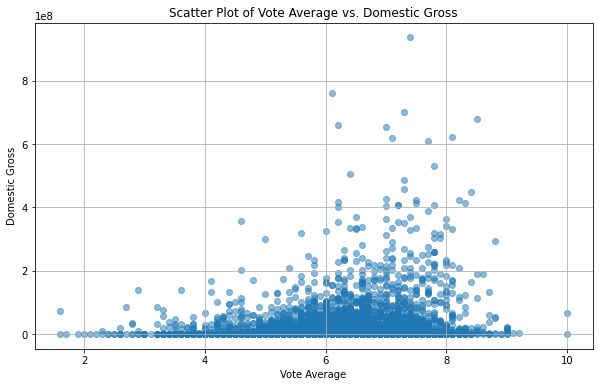

In [227]:
import matplotlib.pyplot as plt

#Creating a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(filtered_df['vote_average'], filtered_df['domestic_gross'], alpha=0.5)
plt.title('Scatter Plot of Vote Average vs. Domestic Gross')
plt.xlabel('Vote Average')
plt.ylabel('Domestic Gross')
plt.grid(True)
plt.show()

## Investigating the relationship between runtime and domestic gross

Once again, there does not appear to be a relationship present. The correlation coefficent of .14 alongside the scatter plot with regression line demonstates that the there is not a strong linear relationship between runtime and domestic gross.

In [228]:
#Checking how many rows are not null for both runtime and domestic gross
filtered_df2 = final_df.dropna(subset=['runtime_minutes', 'domestic_gross'])

print(f"Number of rows after filtering: {len(filtered_df2)}")

Number of rows after filtering: 3645


In [229]:
# Calculating the correlation coefficient
correlation_runtime_domestic = filtered_df2[['runtime_minutes', 'domestic_gross']].corr().iloc[0, 1]
print(f"Correlation between runtime_minutes and domestic_gross: {correlation_runtime_domestic}")

Correlation between runtime_minutes and domestic_gross: 0.14335001256356664


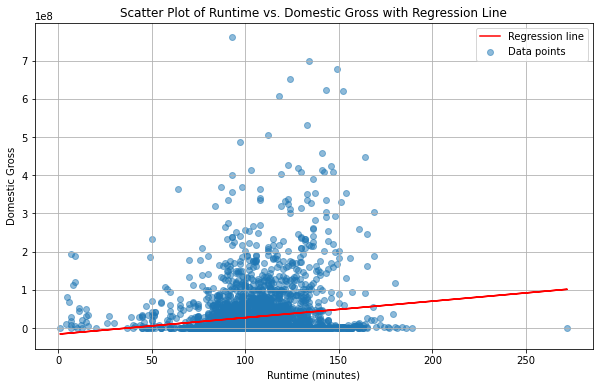

In [230]:
import numpy as np

# Creating a scatter plot with a regression line
plt.figure(figsize=(10, 6))
plt.scatter(filtered_df2['runtime_minutes'], filtered_df2['domestic_gross'], alpha=0.5, label='Data points')

m, b = np.polyfit(filtered_df2['runtime_minutes'], filtered_df2['domestic_gross'], 1)
plt.plot(filtered_df2['runtime_minutes'], m * filtered_df2['runtime_minutes'] + b, color='red', label='Regression line')

plt.title('Scatter Plot of Runtime vs. Domestic Gross with Regression Line')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Domestic Gross')
plt.legend()
plt.grid(True)
plt.show()

## Investigating the relationship between production budget and domestic gross

The correlation coefficient between the two variables was found to be at about .71. This demonstrates a strong relationship between the production budget and the domestic gross. The regression line had a moderate effect size of .499. However, it had to be log-transformed and have its outliers above a z-score of 3 removed since the original model violated some of the assumptions of regression. The log transformed and log transformed with outliers removed regression models were better fits in terms of homoscedascity and normality, yet had slightly weaker effect sizes.

In [231]:
#Checking how many rows are not null for both production_budget and domestic_gross 
filtered_df_3 = final_df.dropna(subset=['production_budget', 'domestic_gross'])

print(f"Number of rows after filtering: {len(filtered_df_3)}")

Number of rows after filtering: 2433


In [232]:
# Calculating the correlation coefficient
correlation_budget_domestic = filtered_df_3[['production_budget', 'domestic_gross']].corr().iloc[0, 1]
print(f"Correlation between production_budget and domestic_gross: {correlation_budget_domestic}")

Correlation between production_budget and domestic_gross: 0.7190118848022914


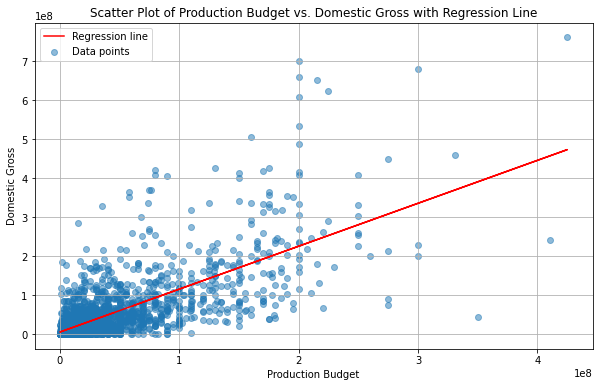

In [233]:
# Creating a scatter plot with regression line
plt.figure(figsize=(10, 6))
plt.scatter(filtered_df_3['production_budget'], filtered_df_3['domestic_gross'], alpha=0.5, label='Data points')

m, b = np.polyfit(filtered_df_3['production_budget'], filtered_df_3['domestic_gross'], 1)
plt.plot(filtered_df_3['production_budget'], m * filtered_df_3['production_budget'] + b, color='red', label='Regression line')

plt.title('Scatter Plot of Production Budget vs. Domestic Gross with Regression Line')
plt.xlabel('Production Budget')
plt.ylabel('Domestic Gross')
plt.legend()
plt.grid(True)
plt.show()

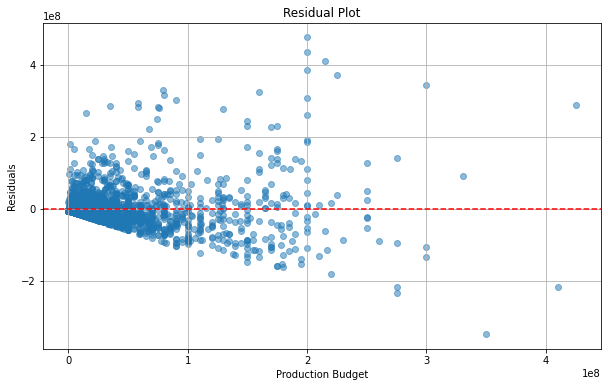

In [234]:
# Doing a Linearity and Homoscedasticity Check

m, b = np.polyfit(filtered_df_3['production_budget'], filtered_df_3['domestic_gross'], 1)
predicted = m * filtered_df_3['production_budget'] + b

residuals = filtered_df_3['domestic_gross'] - predicted

# Creating a residual scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(filtered_df_3['production_budget'], residuals, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('Production Budget')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

In [244]:
#Printing the summary of the regression to investigate the residuals' heteroscedascity
import statsmodels.api as sm

X_original = sm.add_constant(filtered_df_3['production_budget'])
y_original = filtered_df_3['domestic_gross']

model_original = sm.OLS(y_original, X_original).fit()

print("Original Regression Results:")
print(model_original.summary())

Original Regression Results:
                            OLS Regression Results                            
Dep. Variable:         domestic_gross   R-squared:                       0.499
Model:                            OLS   Adj. R-squared:                  0.499
Method:                 Least Squares   F-statistic:                     2112.
Date:                Sun, 23 Jun 2024   Prob (F-statistic):          2.43e-320
Time:                        19:25:28   Log-Likelihood:                -40782.
No. Observations:                2118   AIC:                         8.157e+04
Df Residuals:                    2116   BIC:                         8.158e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const    

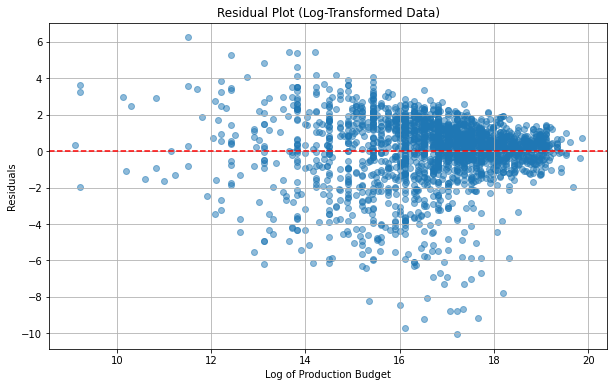

In [236]:
#Applying a log transformation in hopes that this will fix the heteroscedascity problem

# Filtering out rows where production_budget or domestic_gross values are zero or negative
filtered_df_3 = filtered_df_3[(filtered_df_3['production_budget'] > 0) & (filtered_df_3['domestic_gross'] > 0)]

# Applying the log transformation to the production_budget and domestic_gross using
filtered_df_3.loc[:, 'log_production_budget'] = np.log(filtered_df_3['production_budget'])
filtered_df_3.loc[:, 'log_domestic_gross'] = np.log(filtered_df_3['domestic_gross'])

m_log, b_log = np.polyfit(filtered_df_3['log_production_budget'], filtered_df_3['log_domestic_gross'], 1)
predicted_log = m_log * filtered_df_3['log_production_budget'] + b_log

residuals_log = filtered_df_3['log_domestic_gross'] - predicted_log

# Creating another residual plot for the newly log-transformed data
plt.figure(figsize=(10, 6))
plt.scatter(filtered_df_3['log_production_budget'], residuals_log, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residual Plot (Log-Transformed Data)')
plt.xlabel('Log of Production Budget')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

In [245]:
# Noticing and improvement but not quite a fix so I am
# printing the summary of the log-transformed regression to further investigate
X_log = sm.add_constant(filtered_df_3['log_production_budget'])
y_log = filtered_df_3['log_domestic_gross']

# Fitting the OLS model
model_log = sm.OLS(y_log, X_log).fit()

print("\nLog-Transformed Regression Results:")
print(model_log.summary())


Log-Transformed Regression Results:
                            OLS Regression Results                            
Dep. Variable:     log_domestic_gross   R-squared:                       0.445
Model:                            OLS   Adj. R-squared:                  0.445
Method:                 Least Squares   F-statistic:                     1695.
Date:                Sun, 23 Jun 2024   Prob (F-statistic):          1.14e-272
Time:                        19:25:56   Log-Likelihood:                -4368.2
No. Observations:                2118   AIC:                             8740.
Df Residuals:                    2116   BIC:                             8752.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------

                            OLS Regression Results                            
Dep. Variable:     log_domestic_gross   R-squared:                       0.460
Model:                            OLS   Adj. R-squared:                  0.460
Method:                 Least Squares   F-statistic:                     1631.
Date:                Sun, 23 Jun 2024   Prob (F-statistic):          2.41e-258
Time:                        19:20:43   Log-Likelihood:                -3209.5
No. Observations:                1913   AIC:                             6423.
Df Residuals:                    1911   BIC:                             6434.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     1.19

<ipython-input-242-b83d1c476e00>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df_3_no_outliers['residuals_removed'] = model_outliers_removed.resid


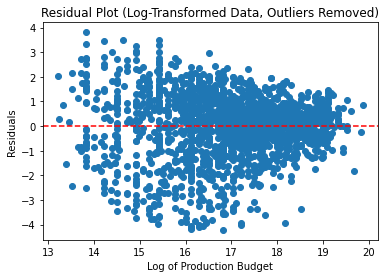

In [242]:
#Removing outliers and then running the regression, plotting the residuals, and getting the summary again 
# Calculating the Z-scores of residuals
filtered_df_3['residuals'] = residuals_log_no_outliers
filtered_df_3['z_score'] = np.abs((filtered_df_3['residuals'] - filtered_df_3['residuals'].mean()) / filtered_df_3['residuals'].std())

# Remove rows where the Z-score is greater than 3
filtered_df_3_no_outliers = filtered_df_3[filtered_df_3['z_score'] <= 3]

# Running the regression again
X_outliers_removed = sm.add_constant(filtered_df_3_no_outliers['log_production_budget'])
model_outliers_removed = sm.OLS(filtered_df_3_no_outliers['log_domestic_gross'], X_outliers_removed).fit()
print(model_outliers_removed.summary())

# Plotting the residuals again
filtered_df_3_no_outliers['residuals_removed'] = model_outliers_removed.resid
plt.scatter(filtered_df_3_no_outliers['log_production_budget'], filtered_df_3_no_outliers['residuals_removed'])
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Log of Production Budget')
plt.ylabel('Residuals')
plt.title('Residual Plot (Log-Transformed Data, Outliers Removed)')
plt.show()



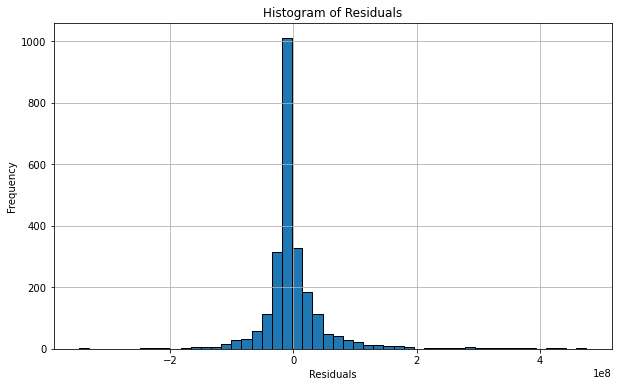

In [239]:
#Checking for normality
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=50, edgecolor='black')
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


## Investigating the relationship between production budget and average vote

The correlation coefficient of .16 demonstates that there is little to no linear relationship between production budget and vote average.

In [246]:
#Filtering the df to include only rows that are not null for both production_budget and vote_average
filtered_df4 = final_df.dropna(subset=['production_budget', 'vote_average'])

#Calculating the correlation between production_budget and vote_average
correlation = filtered_df4['production_budget'].corr(filtered_df4['vote_average'])

print(f"Correlation between Production Budget and Average Vote: {correlation}")

Correlation between Production Budget and Average Vote: 0.1675779453416234


## Investigating which writers and directors get the best vote averages

There are a number of writers and directors who have written/produced atleast 3 movies and average a 9/10 rating or better. For writers these include: Beto Ribeiro, Natasa Kalinic Ahacic and Zeljko Luketic. For directors these include: Fan Li, Francois Lespes', Renjie', and Georges Chamchoum.

In [248]:
#Making sure the writers_x and directors columns aren't null
final_df['writers_x'] = final_df['writers_x'].fillna('')
final_df['directors'] = final_df['directors'].fillna('')

#Filtering out rows where vote_average is null
filtered_final_df = final_df.dropna(subset=['vote_average'])

#Creating a function to create statistics for writers and directors
def create_stats(df, column):
    split_df = df[column].str.split(',', expand=True).stack().reset_index(level=1, drop=True)
    split_df.name = column
    merged_df = df.drop(columns=[column]).join(split_df)
    stats = merged_df.groupby(column).agg(
        avg_vote=('vote_average', 'mean'),
        num_movies=('primary_title', 'count')
    ).reset_index()
    return stats

#Creating statistics for writers and directors and sorting by average vote
writers_stats = create_stats(filtered_final_df, 'writers_x')

directors_stats = create_stats(filtered_final_df, 'directors')

top_10_writers = writers_stats.sort_values(by='avg_vote', ascending=False).head(10)

top_10_directors = directors_stats.sort_values(by='avg_vote', ascending=False).head(10)

top_10_writers_list = top_10_writers.to_dict(orient='records')
top_10_directors_list = top_10_directors.to_dict(orient='records')

print("Top 10 Writers by Average Vote:")
for writer in top_10_writers_list:
    print(writer)

print("\nTop 10 Directors by Average Vote:")
for director in top_10_directors_list:
    print(director)



Top 10 Writers by Average Vote:
{'writers_x': ' marco pontecorvo', 'avg_vote': 10.0, 'num_movies': 1}
{'writers_x': 'david kim', 'avg_vote': 10.0, 'num_movies': 1}
{'writers_x': ' guillermo verdecchia', 'avg_vote': 10.0, 'num_movies': 1}
{'writers_x': ' julia sergina', 'avg_vote': 10.0, 'num_movies': 1}
{'writers_x': 'brad glanden', 'avg_vote': 10.0, 'num_movies': 1}
{'writers_x': 'fahar faizaan', 'avg_vote': 10.0, 'num_movies': 1}
{'writers_x': 'terry huang', 'avg_vote': 10.0, 'num_movies': 1}
{'writers_x': ' steven dubois', 'avg_vote': 10.0, 'num_movies': 1}
{'writers_x': 'ralph moffettone', 'avg_vote': 10.0, 'num_movies': 1}
{'writers_x': 'robert fernandez', 'avg_vote': 10.0, 'num_movies': 1}

Top 10 Directors by Average Vote:
{'directors': 'ralph moffettone', 'avg_vote': 10.0, 'num_movies': 1}
{'directors': 'bennett steber', 'avg_vote': 10.0, 'num_movies': 1}
{'directors': 'jack ayers', 'avg_vote': 10.0, 'num_movies': 1}
{'directors': 'haydn reiss', 'avg_vote': 10.0, 'num_movies': 

In [249]:
#Filtering out writers and directors with less than 3 movies
writers_stats_filtered = writers_stats[writers_stats['num_movies'] >= 3]

top_10_writers_filtered = writers_stats_filtered.sort_values(by='avg_vote', ascending=False).head(10)

directors_stats_filtered = directors_stats[directors_stats['num_movies'] >= 3]

top_10_directors_filtered = directors_stats_filtered.sort_values(by='avg_vote', ascending=False).head(10)

top_10_writers_filtered_list = top_10_writers_filtered.to_dict(orient='records')
top_10_directors_filtered_list = top_10_directors_filtered.to_dict(orient='records')

print("Top 10 Writers by Average Vote (3+ movies):")
for writer in top_10_writers_filtered_list:
    print(writer)

print("\nTop 10 Directors by Average Vote (3+ movies):")
for director in top_10_directors_filtered_list:
    print(director)


Top 10 Writers by Average Vote (3+ movies):
{'writers_x': 'beto ribeiro', 'avg_vote': 9.166666666666666, 'num_movies': 3}
{'writers_x': ' natasa kalinic ahacic', 'avg_vote': 9.075, 'num_movies': 4}
{'writers_x': 'zeljko luketic', 'avg_vote': 9.075, 'num_movies': 4}
{'writers_x': 'branko istvancic', 'avg_vote': 8.966666666666667, 'num_movies': 3}
{'writers_x': 'yasmine asha', 'avg_vote': 8.940000000000001, 'num_movies': 5}
{'writers_x': ' xin tong', 'avg_vote': 8.9, 'num_movies': 3}
{'writers_x': 'yi he', 'avg_vote': 8.9, 'num_movies': 3}
{'writers_x': ' steve ravic', 'avg_vote': 8.875, 'num_movies': 4}
{'writers_x': 'kurt jacobsen', 'avg_vote': 8.833333333333334, 'num_movies': 3}
{'writers_x': 'rob sibley', 'avg_vote': 8.8, 'num_movies': 4}

Top 10 Directors by Average Vote (3+ movies):
{'directors': ' fan li', 'avg_vote': 9.233333333333333, 'num_movies': 3}
{'directors': 'francois lespes', 'avg_vote': 9.1, 'num_movies': 3}
{'directors': 'renjie', 'avg_vote': 9.1, 'num_movies': 3}
{'di

## Investigating which genres have the highest average votes and domestic gross

While short films, game-show movies, documentaries, news movies and biographies tend to get the highest vote averages; adventure, science fiction, animation, fantasy, and action movies typically have the highest domestic gross.

In [253]:
#Checking which genres have the highest vote_averages

final_df['genre'] = final_df['genre'].fillna('')
# Replace 'sci-fi' with 'science fiction' in the 'genre' column
final_df['genre'] = final_df['genre'].str.replace('sci-fi', 'science fiction', case=False)

# Using the explode method on the genre column to treat each str separated by a comma as a separate entry
exploded_genres_df = final_df.copy()
exploded_genres_df['genre'] = exploded_genres_df['genre'].str.split(',')
exploded_genres_df = exploded_genres_df.explode('genre')

exploded_genres_df['genre'] = exploded_genres_df['genre'].str.strip()

exploded_genres_df = exploded_genres_df.dropna(subset=['vote_average'])

genre_stats = exploded_genres_df.groupby('genre').agg(
    avg_vote=('vote_average', 'mean'),
    num_movies=('primary_title', 'count')
).reset_index()

genre_stats_sorted = genre_stats.sort_values(by='avg_vote', ascending=False)

print(genre_stats_sorted)

top_genres = genre_stats_sorted.head(10)
print("\nTop 10 Genres by Average Vote:")
print(top_genres)


              genre  avg_vote  num_movies
22            short  9.400000           2
12        game-show  7.300000           2
8       documentary  7.284376       19131
18             news  7.276007         571
5         biography  7.159096        3694
15            music  7.117437        2661
13          history  7.033888        2886
24        talk-show  7.000000           1
23            sport  6.960862        1114
27              war  6.576689         888
0                    6.498311        2013
16          musical  6.467821         693
9             drama  6.393783       30223
4         animation  6.332968        2645
10           family  6.311194        4011
19       reality-tv  6.194444          18
3         adventure  6.171147        4107
20          romance  6.121083        6868
28          western  6.117470         332
7             crime  6.111902        4596
6            comedy  6.024073       18564
11          fantasy  5.946626        2445
17          mystery  5.938377     

In [254]:
#Doing the same thing as above but with genre combos instead of single genres
final_df['genre'] = final_df['genre'].fillna('').str.strip()

mixed_genres_df = final_df.dropna(subset=['vote_average'])

mixed_genre_stats = mixed_genres_df.groupby('genre').agg(
    avg_vote=('vote_average', 'mean'),
    num_movies=('primary_title', 'count')
).reset_index()

mixed_genre_stats_sorted = mixed_genre_stats.sort_values(by='avg_vote', ascending=False)

print("Mixed Genres Statistics:")
print(mixed_genre_stats_sorted)

top_mixed_genres = mixed_genre_stats_sorted.head(10)

print("\nTop 10 Mixed Genres by Average Vote:")
print(top_mixed_genres)


Mixed Genres Statistics:
                                                  genre  avg_vote  num_movies
1267                                      music,western      10.0           1
21    action,adventure,comedy,crime,drama,music,western      10.0           1
1215                     history,horror,science fiction      10.0           1
690                comedy,documentary,drama,history,war      10.0           1
125       action,comedy,crime,documentary,drama,mystery      10.0           1
...                                                 ...       ...         ...
201                action,drama,horror,mystery,thriller       1.7           1
807                                comedy,musical,sport       1.4           1
358                      adventure,comedy,music,romance       1.0           1
1189                    fantasy,horror,romance,thriller       0.0           1
34                         action,adventure,crime,drama       0.0           1

[1315 rows x 3 columns]

Top 10 Mixed 

In [255]:
# Checking which single genres have the highest average domestic gross
final_df['genre'] = final_df['genre'].fillna('').str.strip()

exploded_genres_df = final_df.copy()
exploded_genres_df['genre'] = exploded_genres_df['genre'].str.split(',')
exploded_genres_df = exploded_genres_df.explode('genre')

exploded_genres_df['genre'] = exploded_genres_df['genre'].str.strip()

exploded_genres_df = exploded_genres_df.dropna(subset=['domestic_gross'])

individual_genre_gross_stats = exploded_genres_df.groupby('genre').agg(
    avg_domestic_gross=('domestic_gross', 'mean'),
    num_movies=('primary_title', 'count')
).reset_index()

individual_genre_gross_stats_sorted = individual_genre_gross_stats.sort_values(by='avg_domestic_gross', ascending=False)

print("Individual Genres Statistics based on Domestic Gross:")
print(individual_genre_gross_stats_sorted)

top_individual_genres_gross = individual_genre_gross_stats_sorted.head(10)

print("\nTop 10 Individual Genres by Average Domestic Gross:")
print(top_individual_genres_gross)


Individual Genres Statistics based on Domestic Gross:
              genre  avg_domestic_gross  num_movies
2         adventure        9.172631e+07         550
18  science fiction        9.035340e+07         202
3         animation        8.061940e+07         193
10          fantasy        5.897065e+07         219
1            action        5.695681e+07         809
9            family        4.765893e+07         181
5            comedy        3.185735e+07        1147
14          musical        2.648652e+07          29
20         thriller        2.504100e+07         569
22          western        2.358891e+07          26
19            sport        2.337514e+07          70
15          mystery        2.285058e+07         261
12           horror        2.214956e+07         351
6             crime        2.176173e+07         479
0                          2.142343e+07         611
4         biography        1.911994e+07         342
13            music        1.815817e+07         120
8         